# Project 2: DSB-SC
Group 6 Jie Wang
- Oct 21, 2023

## Modulation

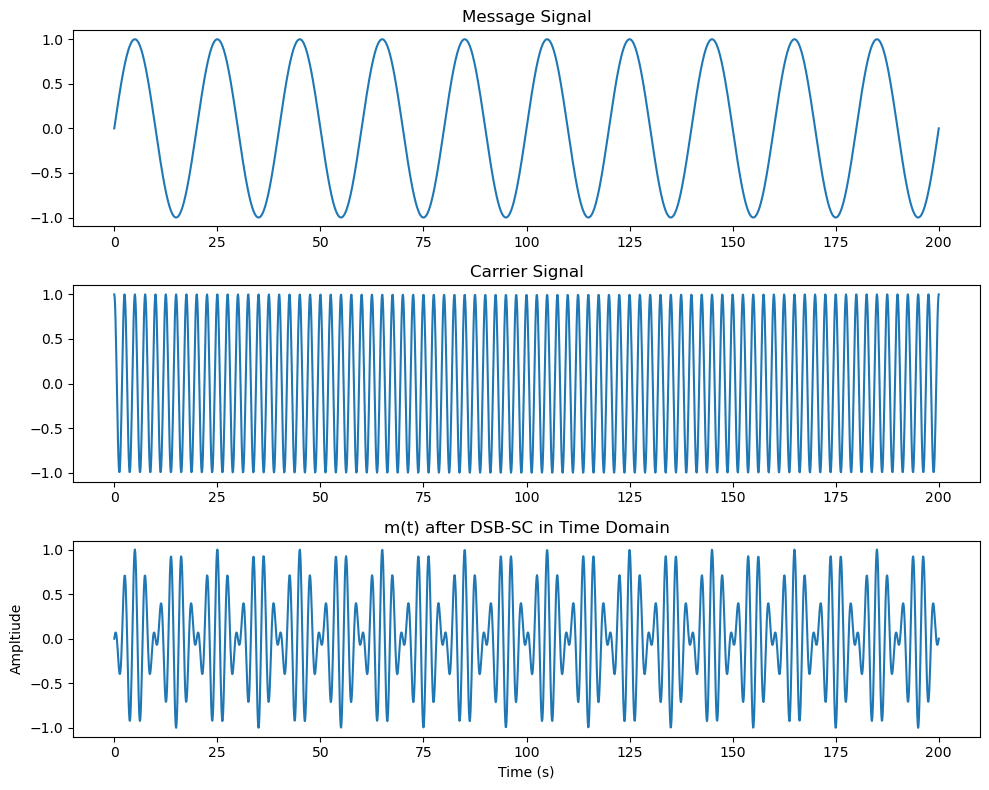

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Setup
Ac = 1
fc = 0.4
fm = 0.05
fs = 10  
t = np.linspace(0, 200, 2000)  

# Message and carrier signals
message = Ac * np.sin(2 * np.pi * fm * t)
carrier = np.cos(2 * np.pi * fc * t)

# DSB-SC modulation
dsbsc = message * carrier

# Plot
plt.figure(figsize=(10,8))
plt.subplot(3, 1, 1)
plt.title("Message Signal")
plt.plot(t, message)
plt.subplot(3, 1, 2)
plt.title("Carrier Signal")
plt.plot(t, carrier)
plt.subplot(3, 1, 3)
plt.title("m(t) after DSB-SC in Time Domain")
plt.plot(t, dsbsc)
plt.xlabel('Time (s)')
plt.ylabel('Ampltiude')
plt.tight_layout()
plt.show()


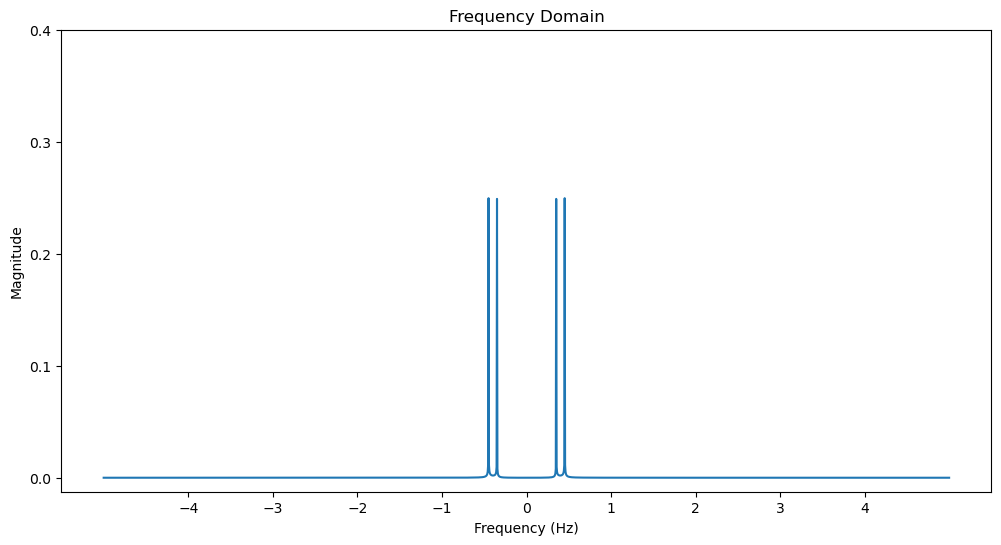

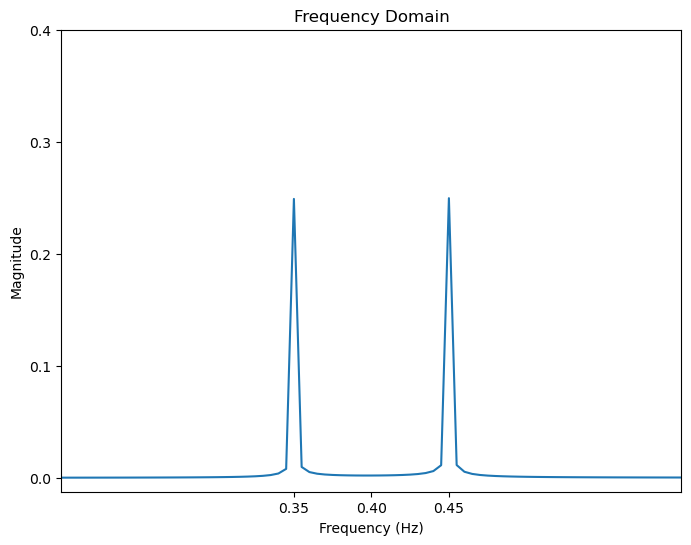

In [28]:


dsbsc_fft = np.fft.fftshift(np.fft.fft(dsbsc)) / len(dsbsc)
frequencies = np.fft.fftshift(np.fft.fftfreq(len(dsbsc), 1/fs))

# Plot the magnitude spectrum
plt.figure(figsize=(12, 6))
plt.title('Frequency Domain')
# plt.title("Magnitude Spectrum of the Modulated Wave")
plt.plot(frequencies, np.abs(dsbsc_fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xticks(np.arange(-4, 4.5, 1))  # Adjust x-axis tick locations
plt.yticks(np.arange(0 , 0.5, 0.1))  

# Expanded spectrum around the carrier frequency
plt.figure(figsize=(8, 6))
plt.title('Frequency Domain')
# plt.title("Expanded Spectrum around Carrier Frequency")
plt.plot(frequencies, np.abs(dsbsc_fft))
plt.xlim([fc-0.2, fc+0.2])  # Zooming in around the carrier frequency
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.xticks(np.arange(0.35, 0.46, 0.05))  # Adjust x-axis tick locations
plt.yticks(np.arange(0 , 0.5, 0.1))  

plt.show()


## Demodulation

To demodulate signal from the DSB-SC, we need:
1. **Produce the Signal at the Product Modulator's Output**:
   - Multiply the DSB-SC signal by the carrier.
   - The result will have the original message frequency and a frequency at twice the carrier frequency.

2. **Generate the Amplitude Spectrum for the Signal from Step 1**:
   - Perform an FFT on the signal from step 1.
   - Plot the magnitude of the FFT result.

3. **Low-Pass Filter the Signal from Step 1**:
   - Use a low-pass filter to remove the higher frequency component (2fc).
   - The output will be similar to the original message signal.

4. **Generate the Amplitude Spectrum for the Signal from Step 3**:
   - Perform an FFT on the filtered signal.
   - Plot the magnitude of the FFT result.

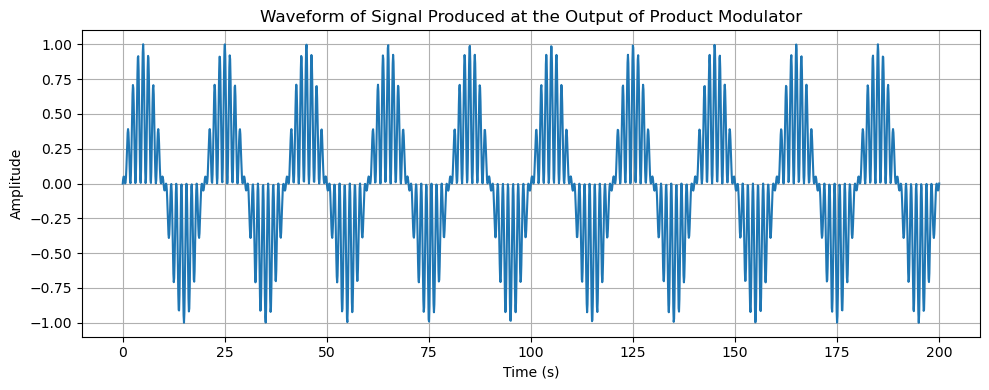

In [29]:
# Multiply the DSB-SC modulated signal with the carrier
product_signal = dsbsc * carrier

# Plot the product signal
plt.figure(figsize=(10, 4))
plt.plot(t, product_signal)
plt.title('Waveform of Signal Produced at the Output of Product Modulator')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


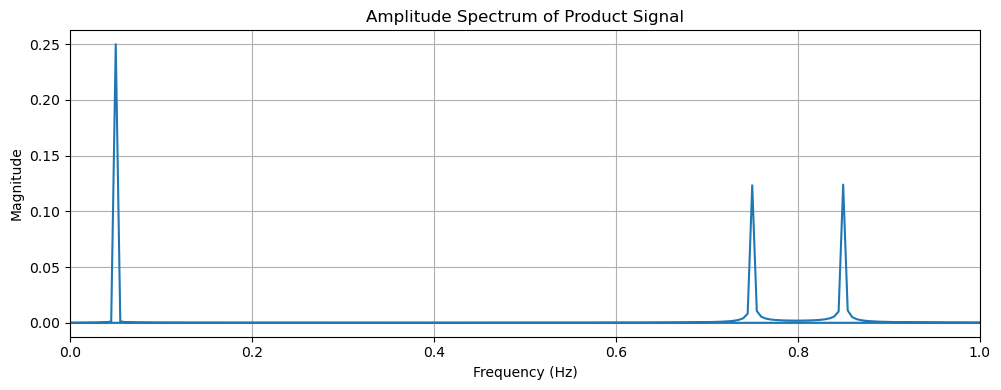

In [30]:
# Compute the FFT of the product signal
product_signal_fft = np.fft.fft(product_signal) / len(product_signal)
freqs = np.fft.fftfreq(len(product_signal), d=t[1]-t[0])

# Plot the magnitude spectrum
plt.figure(figsize=(10, 4))
plt.plot(freqs, np.abs(product_signal_fft))
plt.title('Amplitude Spectrum of Product Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.xlim([0, 1.0])  # limiting to view the main spectral components
plt.show()


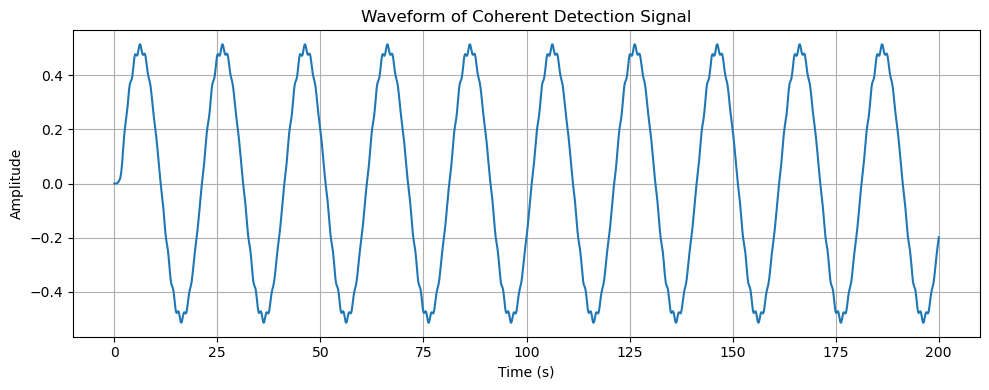

In [31]:
from scipy.signal import butter, lfilter
# Here we use butterworth filter to achieve optimal outcome. 
def lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter(order, cutoff / (0.5 * fs), btype='low')
    return lfilter(b, a, data)

# Apply the low-pass filter
filtered_signal = lowpass_filter(product_signal, fc, fs)

# Plot the filtered signal
plt.figure(figsize=(10, 4))
plt.plot(t, filtered_signal)
plt.title('Waveform of Coherent Detection Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()


### Difference between textbook graph and ours
1. We observed that the initial position of demodulated output is slighly different than the original message signal m(t) and the graph in the textbook.
- Prof [explains](https://campuswire.com/c/G1FB3BD93/feed/1) this is caused by the small transient response when applying fft to the product signal.
- After consideration, we think such a tiny difference is hard to be realized using Python and it's unnecessary, as it is not the expecting feature of low-pass filter. 
2. The peak of our graph has many spikes, we consider some reasons behind it:
- Filtering Artifacts: The abrupt peaks might be a result of the filtering process. For instance, the initial transient response of the filter might not have been completely settled, leading to these spikes.

- Sampling Issues: Tthe resolution of the sampling is just only 10Hz, which isn't fine enough. A higher sampling rate could potentially alleviate this.

- FFT Spectral Leakage: As the Fast Fourier Transform (FFT) and its inverse was use, [spectral leakage](https://en.wikipedia.org/wiki/Spectral_leakage) could cause such sharp transitions in the time domain.

- Numerical Instabilities: the numerical limitation of digital signals can generate certain unexpected artifacts.

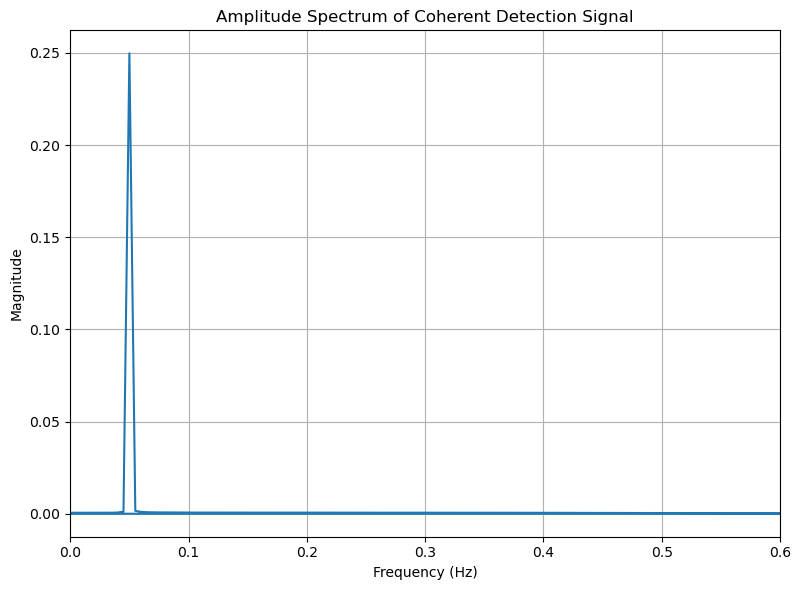

In [32]:
# Compute the FFT of the filtered signal
filtered_signal_fft = np.fft.fft(filtered_signal) /len(filtered_signal)

# Plot the magnitude spectrum
plt.figure(figsize=(8, 6))
plt.plot(freqs, np.abs(filtered_signal_fft))
plt.title('Amplitude Spectrum of Coherent Detection Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.tight_layout()
plt.xlim([0, 0.6])  
plt.show()
